In [1]:
import numpy as np
from math import sqrt

from mlgrad.cluster import KMeans, KMeansMahalanobis

In [2]:
import sklearn.datasets as datasets
import sklearn.preprocessing as preprocessing
import matplotlib.pyplot as plt

In [3]:
X_wine, Y_wine = datasets.load_wine(return_X_y=True)
X_wine = preprocessing.scale(X_wine)
print(X_wine.shape)

(178, 13)


In [4]:
from sklearn.decomposition import PCA

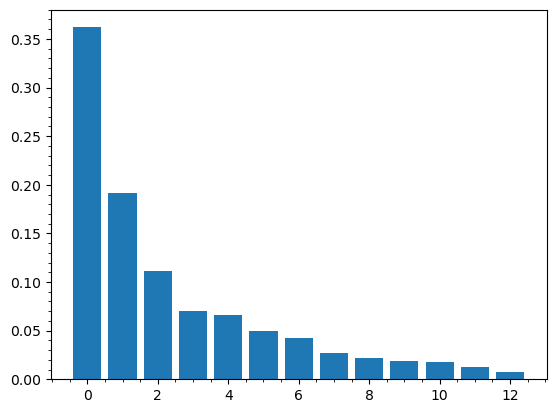

In [5]:
pca = PCA(13)
pca.fit(X_wine)
X = pca.transform(X_wine)
Y = Y_wine

plt.bar(range(pca.n_components), pca.explained_variance_ratio_)
plt.minorticks_on()
plt.show()

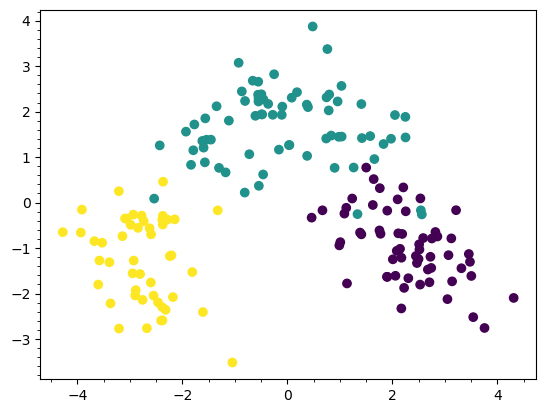

In [6]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.minorticks_on()
plt.show()

In [7]:
def get_range(a, q=20):
    amin, amax = min(a), max(a)
    h = (amax - amin) / q
    return amin - h, amax + h

xmin, xmax = get_range(X[:,0])
ymin, ymax = get_range(X[:,1])
XX, YY = np.meshgrid(
            np.linspace(xmin, xmax, 100), 
            np.linspace(ymin, ymax, 100))
XY = np.c_[(XX.ravel(), YY.ravel())]

In [8]:
km = KMeans(3)

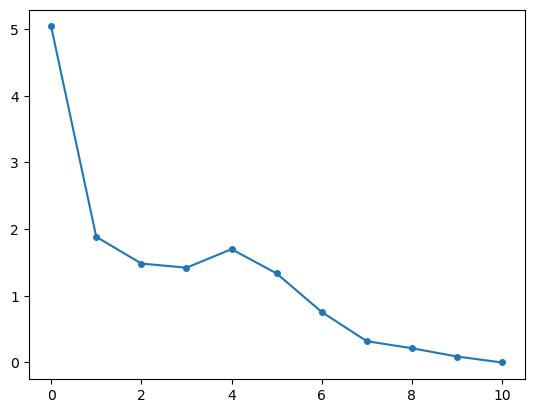

In [9]:
km.fit(X)
plt.plot(km.dvals, marker='o', markersize=4)
plt.show()

In [10]:
Y_p = km.predict(X)

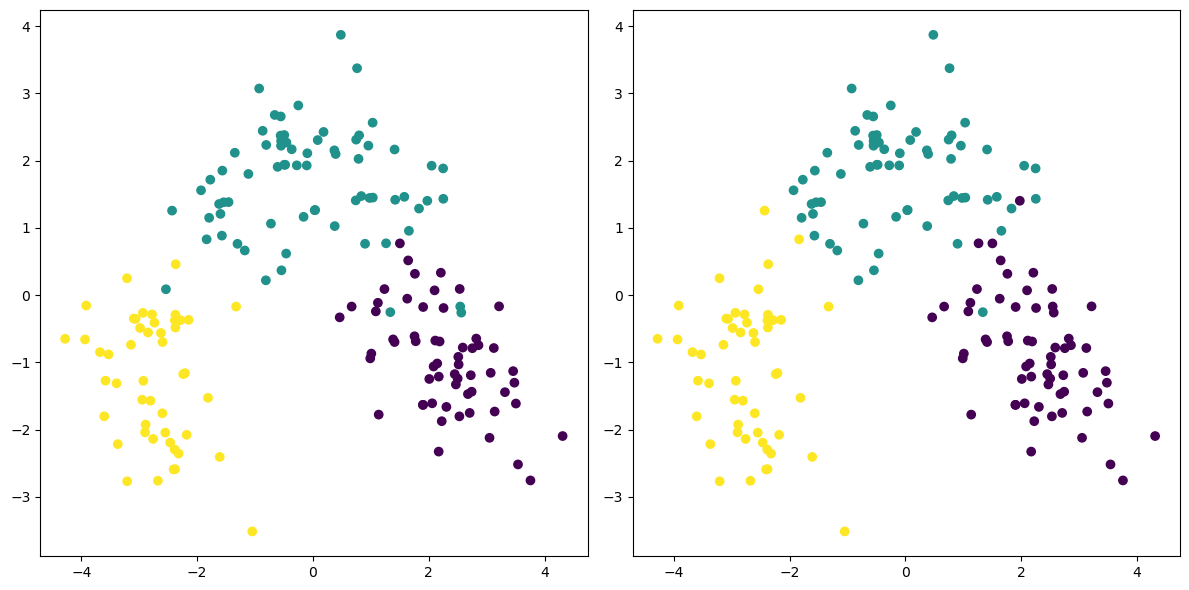

In [11]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c=Y)
plt.subplot(1,2,2)
plt.scatter(X[:,0], X[:,1], c=Y_p)
plt.tight_layout()
plt.show()

In [14]:
kmm = KMeansMahalanobis(3)

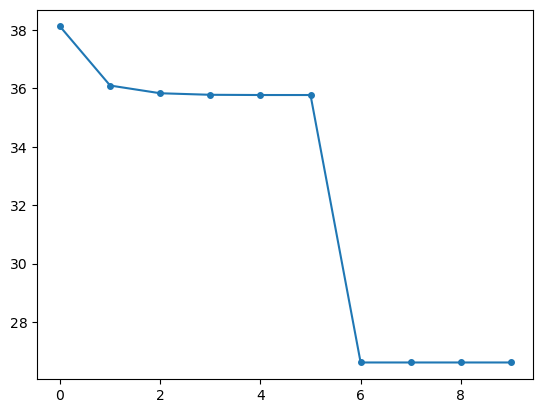

In [15]:
kmm.fit(X)

plt.plot(kmm.qvals, marker='o', markersize=4)
plt.show()

In [16]:
Y2_p = kmm.predict(X)

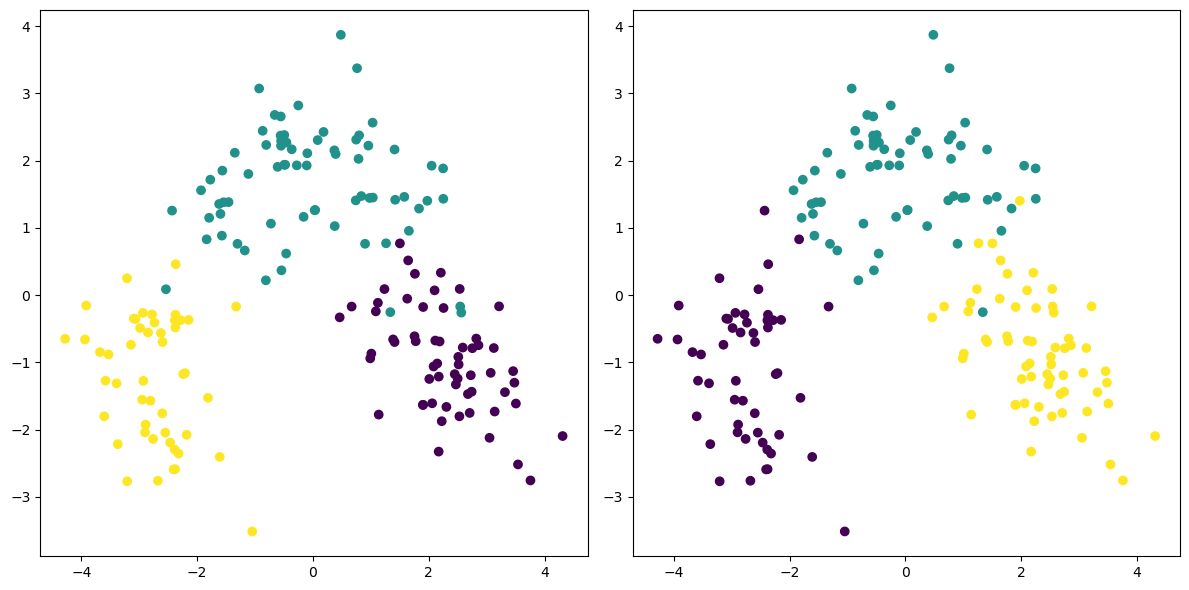

In [17]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c=Y)
plt.subplot(1,2,2)
plt.scatter(X[:,0], X[:,1], c=Y2_p)
plt.tight_layout()
plt.show()

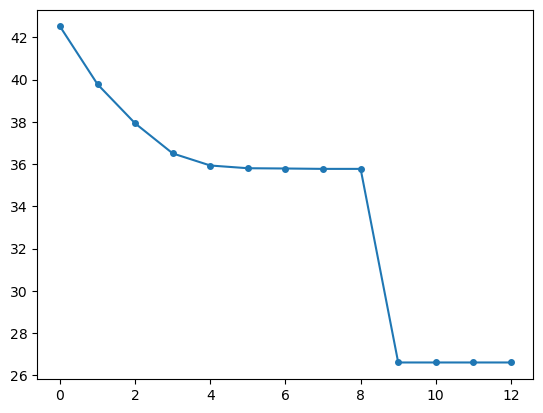

In [18]:
kmm3 = KMeansMahalanobis(3)
kmm3.fit(X_wine)

plt.plot(kmm3.qvals, marker='o', markersize=4)
plt.show()

In [19]:
Y3 = kmm3.predict(X_wine)

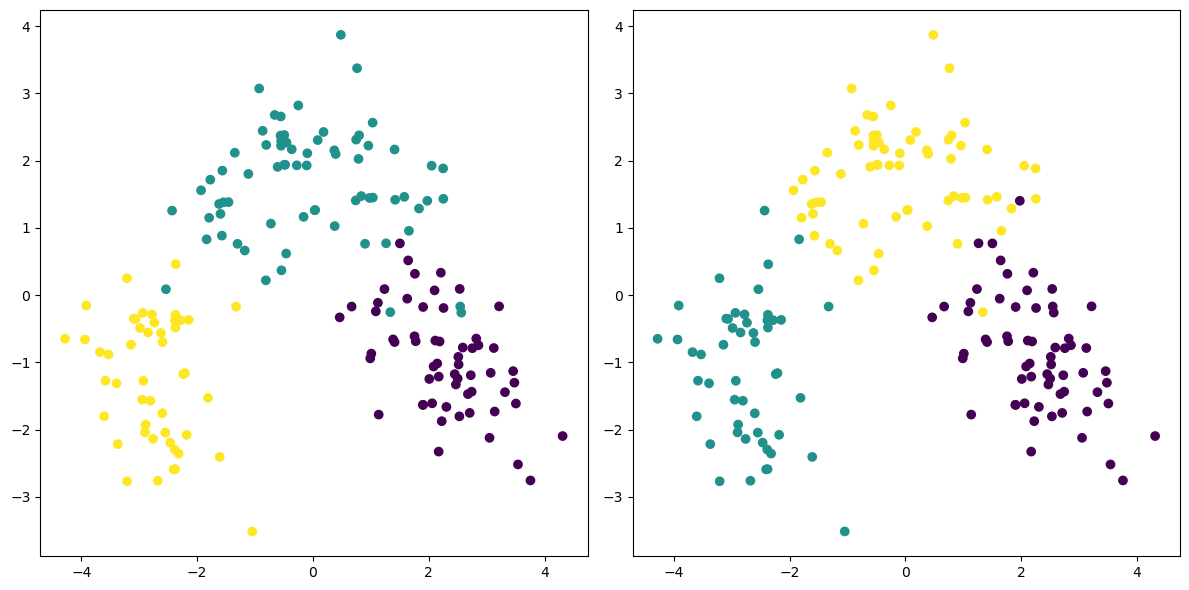

In [20]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c=Y)
plt.subplot(1,2,2)
plt.scatter(X[:,0], X[:,1], c=Y3)
plt.tight_layout()
plt.show()